In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from pathlib import Path
from matplotlib.ticker import ScalarFormatter

In [2]:
def load_fold_data(experiment_dir, fold, epoch):
    """
    Generalized function to load fold data from a given experiment directory.

    Args:
        experiment_dir (str): The directory path where the experiment data is stored.
        num_folds (int): Number of folds (e.g., 3 for fold_0, fold_1, fold_2).
        epoch (int): Epoch number to be loaded (e.g., 0 for epoch_0).

    Returns:
        pd.DataFrame: A DataFrame containing the concatenated data of all folds with fold information.
    """
    file_path = os.path.join(
        experiment_dir, f"fold_{fold}_epoch_{epoch}_metrics.csv"
    )

    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df["fold"] = fold
        return df
    else:
        print(f"Warning: File {file_path} does not exist.")

In [3]:
register_df = pd.read_csv("/net/scratch/cmosig/segmentation_meta/tiles_2025/register.csv")
register_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378429 entries, 0 to 378428
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   base_file_name    378429 non-null  object 
 1   file_path         378429 non-null  object 
 2   global_file_path  378429 non-null  object 
 3   resolution        378429 non-null  float64
 4   x                 378429 non-null  int64  
 5   y                 378429 non-null  int64  
 6   label_quality     378429 non-null  float64
 7   mask_filled       378429 non-null  bool   
 8   resolution_bin    378429 non-null  float64
 9   original          378429 non-null  bool   
 10  biome             378429 non-null  float64
 11  biome_group       378429 non-null  int64  
dtypes: bool(2), float64(4), int64(3), object(3)
memory usage: 29.6+ MB


In [5]:
experiment_dir = "/net/scratch/cmosig/experiment_dir_deadwood_segmentation/segformer_b5_oversample_newdata/"

run_metrics_0 = load_fold_data( experiment_dir, 0, 104 )
run_metrics_1 = load_fold_data( experiment_dir, 1, 104 )
run_metrics_2 = load_fold_data( experiment_dir, 2, 104 )

In [6]:
metrics_df = pd.concat([run_metrics_0, run_metrics_1, run_metrics_2], ignore_index=True)
metrics_df

,precision_0.1,precision_0.2,precision_0.3,precision_0.4,precision_0.5,precision_0.6,precision_0.7,precision_0.8,precision_0.9,recall_0.1,...,iou_0.3,iou_0.4,iou_0.5,iou_0.6,iou_0.7,iou_0.8,iou_0.9,register_index,epoch,fold
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8895.0,104,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8896.0,104,0
2,0.099766,0.099802,0.099830,0.099879,0.099893,0.099943,0.099858,0.099900,0.099957,0.880550,...,0.098488,0.098536,0.098542,0.098591,0.098492,0.098533,0.098589,8897.0,104,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8898.0,104,0
4,0.074263,0.074270,0.074269,0.074299,0.074309,0.074329,0.074341,0.074335,0.074369,0.761346,...,0.072573,0.072602,0.072609,0.072626,0.072637,0.072627,0.072659,8899.0,104,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319135,0.919085,0.919186,0.919288,0.919436,0.919696,0.919793,0.920058,0.920380,0.920655,0.863621,...,0.802556,0.802471,0.802472,0.802398,0.802451,0.802548,0.802708,377337.0,104,2
319136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,377338.0,104,2
319137,0.414293,0.414950,0.415545,0.415772,0.416288,0.416535,0.417063,0.417610,0.417761,0.541939,...,0.307407,0.307284,0.307317,0.307243,0.307406,0.307619,0.307450,2342.0,104,2
319138,0.291166,0.291516,0.291491,0.291805,0.292424,0.292564,0.292527,0.292705,0.293061,0.767221,...,0.267516,0.267684,0.268205,0.268225,0.268096,0.268245,0.268544,2343.0,104,2


In [7]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
metrics_df = metrics_df[
    (metrics_df[[f"precision_{t}" for t in thresholds]] != 0).any(axis=1)
    & (metrics_df[[f"recall_{t}" for t in thresholds]] != 0).any(axis=1)
    & (metrics_df[[f"f1_{t}" for t in thresholds]] != 0).any(axis=1)
]

In [8]:
metrics_df.groupby("fold").agg(
    {"precision_0.5": "mean", "recall_0.5": "mean", "f1_0.5": "mean"}
).reset_index()

,fold,precision_0.5,recall_0.5,f1_0.5
0,0,0.521442,0.768943,0.570894
1,1,0.448052,0.832216,0.529272
2,2,0.629860,0.680715,0.591847


In [9]:
metrics_df.agg(
    {"precision_0.5": "mean", "recall_0.5": "mean", "f1_0.5": "mean"}
).reset_index()

,index,0
0,precision_0.5,0.537176
1,recall_0.5,0.757231
2,f1_0.5,0.565493


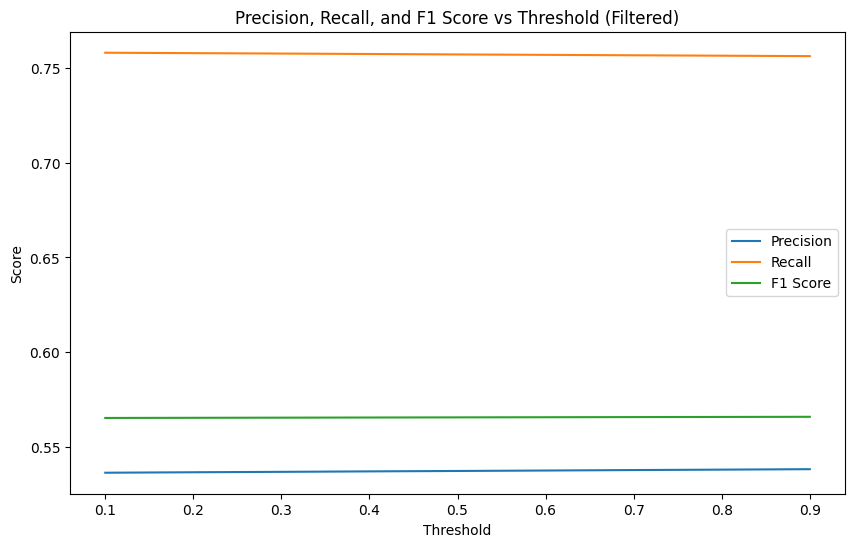

In [10]:
# Filtering the dataframe to exclude rows where all precision, recall, and f1 scores are 0 across all thresholds

plot_df = metrics_df
plot_df = plot_df[
    (plot_df[[f"precision_{t}" for t in thresholds]] != 0).any(axis=1)
    & (plot_df[[f"recall_{t}" for t in thresholds]] != 0).any(axis=1)
    & (plot_df[[f"f1_{t}" for t in thresholds]] != 0).any(axis=1)
]
# Recalculating mean precision, recall, and f1 scores for each threshold based on the filtered dataframe
mean_precision_filtered = plot_df[[f"precision_{t}" for t in thresholds]].mean(axis=0)
mean_recall_filtered = plot_df[[f"recall_{t}" for t in thresholds]].mean(axis=0)
mean_f1_filtered = plot_df[[f"f1_{t}" for t in thresholds]].mean(axis=0)

# Creating a new dataframe for plotting
plot_data_filtered = pd.DataFrame(
    {
        "threshold": thresholds,
        "mean_precision": mean_precision_filtered.values,
        "mean_recall": mean_recall_filtered.values,
        "mean_f1": mean_f1_filtered.values,
    }
)

# Now plotting using seaborn with the filtered data
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="threshold", y="mean_precision", data=plot_data_filtered, label="Precision"
)
sns.lineplot(x="threshold", y="mean_recall", data=plot_data_filtered, label="Recall")
sns.lineplot(x="threshold", y="mean_f1", data=plot_data_filtered, label="F1 Score")

plt.title("Precision, Recall, and F1 Score vs Threshold (Filtered)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

In [11]:
# join the register with the metrics
register_metrics = pd.merge(
    register_df, metrics_df, right_on="register_index", left_index=True
)

In [12]:
register_metrics.columns

Index(['base_file_name', 'file_path', 'global_file_path', 'resolution', 'x',
       'y', 'label_quality', 'mask_filled', 'resolution_bin', 'original',
       'biome', 'biome_group', 'precision_0.1', 'precision_0.2',
       'precision_0.3', 'precision_0.4', 'precision_0.5', 'precision_0.6',
       'precision_0.7', 'precision_0.8', 'precision_0.9', 'recall_0.1',
       'recall_0.2', 'recall_0.3', 'recall_0.4', 'recall_0.5', 'recall_0.6',
       'recall_0.7', 'recall_0.8', 'recall_0.9', 'f1_0.1', 'f1_0.2', 'f1_0.3',
       'f1_0.4', 'f1_0.5', 'f1_0.6', 'f1_0.7', 'f1_0.8', 'f1_0.9', 'iou_0.1',
       'iou_0.2', 'iou_0.3', 'iou_0.4', 'iou_0.5', 'iou_0.6', 'iou_0.7',
       'iou_0.8', 'iou_0.9', 'register_index', 'epoch', 'fold'],
      dtype='object')

In [13]:
biome_dict = {
    1: "Tropical and Subtropical Moist Broadleaf Forests",
    2: "Tropical and Subtropical Dry Broadleaf Forests",
    3: "Tropical and Subtropical Coniferous Forests",
    4: "Temperate Broadleaf and Mixed Forests",
    5: "Temperate Coniferous Forests",
    6: "Boreal Forests/Taiga",
    7: "Tropical and Subtropical Grasslands, Savannas, and Shrublands",
    8: "Temperate Grasslands, Savannas, and Shrublands",
    9: "Flooded Grasslands and Savannas",
    10: "Montane Grasslands and Shrublands",
    11: "Tundra",
    12: "Mediterranean Forests, Woodlands, and Scrub",
    13: "Deserts and Xeric Shrublands",
    14: "Mangroves",
}

In [14]:
BIOMEGROUPINGS = {
    "(Sub) Tropical": [1, 2, 3, 14, 7],
    "Temperate": [4, 5, 8],
    "Boreal and Montane": [6, 11, 10],
    "Drylands": [12, 13, 9],
}

BIOMEGROUPINGS_INDEX_NAME = dict(zip(range(1, len(BIOMEGROUPINGS.keys()) + 1), BIOMEGROUPINGS.keys()))
BIOMEGROUPINGS_INDEX_NAME

{1: '(Sub) Tropical', 2: 'Temperate', 3: 'Boreal and Montane', 4: 'Drylands'}

In [15]:
register_metrics = register_metrics[register_metrics["resolution_bin"] != 0.28]

Index(['base_file_name', 'file_path', 'global_file_path', 'resolution', 'x',
       'y', 'label_quality', 'mask_filled', 'resolution_bin', 'original',
       'biome', 'biome_group', 'precision_0.1', 'precision_0.2',
       'precision_0.3', 'precision_0.4', 'precision_0.5', 'precision_0.6',
       'precision_0.7', 'precision_0.8', 'precision_0.9', 'recall_0.1',
       'recall_0.2', 'recall_0.3', 'recall_0.4', 'recall_0.5', 'recall_0.6',
       'recall_0.7', 'recall_0.8', 'recall_0.9', 'f1_0.1', 'f1_0.2', 'f1_0.3',
       'f1_0.4', 'f1_0.5', 'f1_0.6', 'f1_0.7', 'f1_0.8', 'f1_0.9', 'iou_0.1',
       'iou_0.2', 'iou_0.3', 'iou_0.4', 'iou_0.5', 'iou_0.6', 'iou_0.7',
       'iou_0.8', 'iou_0.9', 'register_index', 'epoch', 'fold'],
      dtype='object')
resolution_bin
0.00    0.512404
0.02    0.508524
0.04    0.520606
0.06    0.521201
0.08    0.500715
0.10    0.475503
0.12    0.457341
0.14    0.444307
0.16    0.430818
0.18    0.424633
0.20    0.409294
0.22    0.381482
0.24    0.376396
0.26   

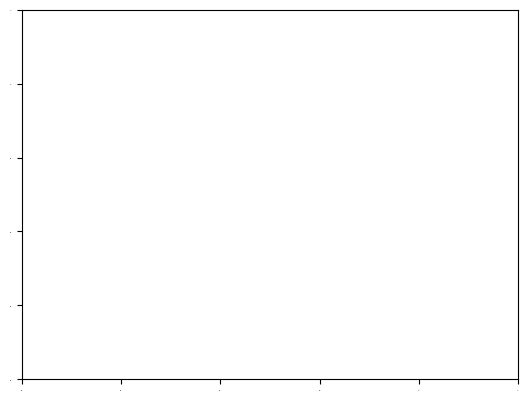

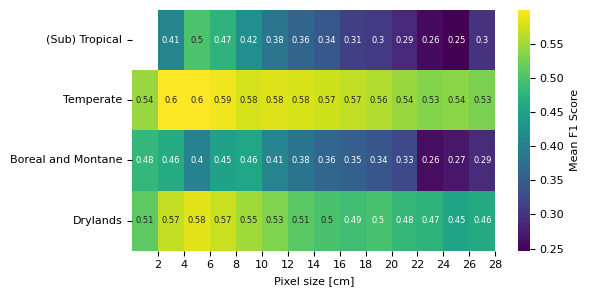

In [17]:
fontsize = 8
# plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['font.size'] = fontsize
plt.rcParams['legend.fontsize'] = fontsize
plt.tick_params(axis='both', labelsize=1)

heat_df = register_metrics[
    (register_metrics[[f"precision_{t}" for t in thresholds]] != 0).any(axis=1)
    & (register_metrics[[f"recall_{t}" for t in thresholds]] != 0).any(axis=1)
    & (register_metrics[[f"f1_{t}" for t in thresholds]] != 0).any(axis=1)
]

print(heat_df.columns)
# Group by 'biome' and 'resolution_bin', calculating the mean of 'f1_0.5'

heat_df["biome_quality"] = heat_df[["biome_group", "label_quality"]].apply(tuple, axis=1)

heatmap_data = (
    heat_df.groupby(["biome_group", "resolution_bin"])["f1_0.5"].mean().unstack()
)

print(heat_df.groupby(["biome_group", "resolution_bin"])["f1_0.5"].mean().groupby("resolution_bin").mean())

# use the biome_dict to replace the biome numbers with the biome names
heatmap_data.index = heatmap_data.index.map(BIOMEGROUPINGS_INDEX_NAME)

# roud to three decimal places
heatmap_data = heatmap_data.round(3)
# Plot the heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(
    heatmap_data, cmap="viridis", annot=True, cbar_kws=dict(label="Mean F1 Score"), annot_kws=dict(fontsize=6),
)
plt.ylabel("")
plt.xlabel("Pixel size [cm]")
plt.tight_layout()

plt.xticks(np.arange(1, len(heatmap_data.columns)+1, 1), np.arange(2, 30, 2))

plt.savefig("/net/home/cmosig/projects/standing-deadwood/plots/performance_heatmap.pdf")
plt.show()

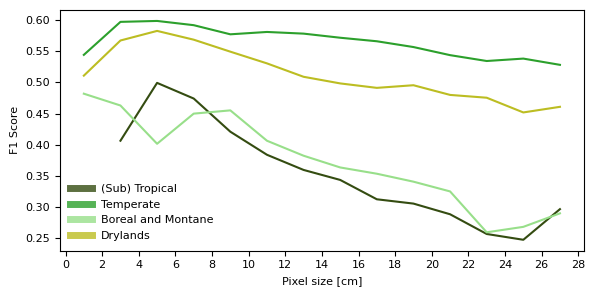

In [57]:
from matplotlib import lines as mlines

colors = {
    "(Sub) Tropical": "#344C11",  # color in words: "darkolivegreen"
    "Temperate": "#2ca02c",  # color in words: "green"
    "Boreal and Montane": "#98df8a",  # color in words: "palegreen"
    "Drylands": "#bcbd22",  # color in words: "gold"
}


# heatmap_data.plot(x="resolution_bin", y="metric")
temp_df = heat_df.groupby(["biome_group", "resolution_bin"])["f1_0.5"].mean().reset_index()

fig, ax = plt.subplots(figsize=(6, 3))
for k, group in temp_df.groupby("biome_group"):
    group.plot(x="resolution_bin", y="f1_0.5", kind="line", ax=ax, color=list(colors.values())[k-1])

ax.set_ylabel("F1 Score")
ax.set_xlabel("Pixel size [cm]")

ax.set_xticks(np.arange(-0.01, 0.28, 0.02))
ax.set_xticklabels(np.arange(0, 30,2))

handles = [
    mlines.Line2D([], [], color=v, label=k, linewidth=5, alpha=0.8)
    for k, v in colors.items()
]

ax.legend(handles=handles,
              frameon=False,
              loc="lower left")

fig.tight_layout()

plt.savefig("/net/home/cmosig/projects/standing-deadwood/plots/performance_lineplot.pdf")